In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [62]:
dng = pd.read_csv('dataset\\dengue.csv')

In [63]:
dng

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [64]:
dng['Year'].value_counts()

Year
2016    204
2017    204
2018    204
2019    204
2020    204
Name: count, dtype: int64

In [65]:
dng.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [66]:
dng.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [88]:
dng['Month'] = dng['Month'].astype('category')
dng['Region'] = dng['Region'].astype('category')

<h1>UniVariate</h1>

In [89]:
dng2016 = dng[dng['Year'] == 2016]
dng2017 = dng[dng['Year'] == 2017]
dng2018 = dng[dng['Year'] == 2018]
dng2019 = dng[dng['Year'] == 2019]
dng2020 = dng[dng['Year'] == 2020]

<h1>1. What is the distribution of dengue cases across different years?</h1>

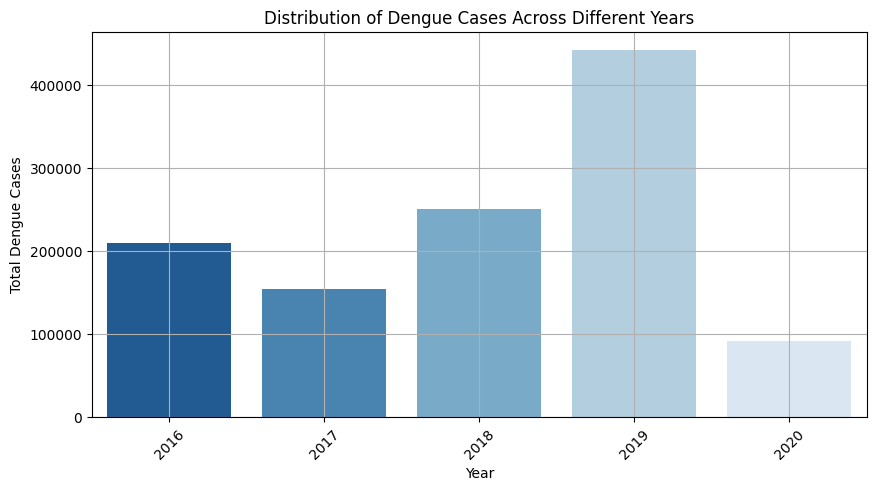

In [90]:
yearly_cases = dng.groupby("Year")["Dengue_Cases"].sum()


plt.figure(figsize=(10, 5))
sns.barplot(x=yearly_cases.index, y=yearly_cases.values, palette="Blues_r")


plt.xlabel("Year")
plt.ylabel("Total Dengue Cases")
plt.title("Distribution of Dengue Cases Across Different Years")
plt.xticks(rotation=45)
plt.grid(True)


plt.show()

<h1>Dengue cases were highest in 2019 and dropped a lot in 2020, possibly due to health efforts or the COVID-19 pandemic.</h1>

<h1>2. What is the distribution of dengue deaths across different years?</h1>

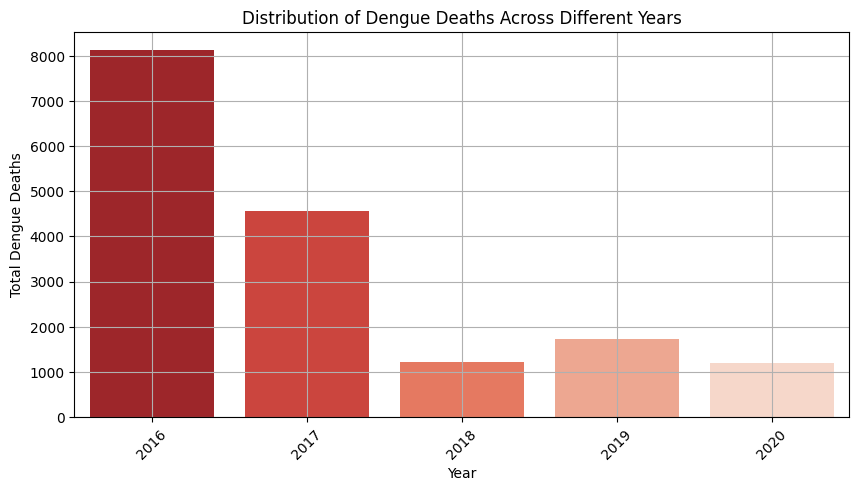

In [91]:
yearly_deaths = dng.groupby("Year")["Dengue_Deaths"].sum()


plt.figure(figsize=(10, 5))
sns.barplot(x=yearly_deaths.index, y=yearly_deaths.values, palette="Reds_r")


plt.xlabel("Year")
plt.ylabel("Total Dengue Deaths")
plt.title("Distribution of Dengue Deaths Across Different Years")
plt.xticks(rotation=45)
plt.grid(True)


plt.show()

<h1>Dengue deaths increased a lot in 2019 and then dropped in 2020, showing a change in disease impact or healthcare response.</h1>

<h1>3. What is the average number of cases per year?</h1>

In [92]:
average_cases_per_year = dng.groupby("Year")["Dengue_Cases"].mean()

print("Average Dengue Cases Per Year:")
print(average_cases_per_year)

Average Dengue Cases Per Year:
Year
2016    1027.176471
2017     755.661765
2018    1229.328431
2019    2166.186275
2020     446.279412
Name: Dengue_Cases, dtype: float64


<h1>Dengue cases went up and down over the years, reaching the highest in 2019 (2,166 per month) before dropping a lot in 2020 (446 per month), possibly because of the pandemic, weather, or health efforts.</h1>

<h1>4. What is the average number of deaths per year?</h1>

In [93]:
average_deaths_per_year = dng.groupby("Year")["Dengue_Deaths"].mean()

print("Average dengue deaths per year:")
print(average_deaths_per_year)

Average dengue deaths per year:
Year
2016    39.838235
2017    22.367647
2018     6.009804
2019     8.495098
2020     5.857843
Name: Dengue_Deaths, dtype: float64


<h1>The average number of dengue deaths per year varies, with the highest in 2016 and a decrease in later years.</h1>

<h1>5. How do yearly dengue deaths vary in the period?</h1>

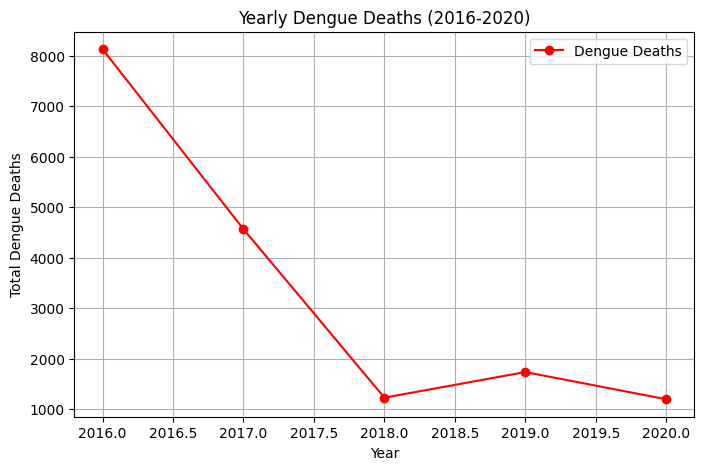

Year
2016    8127
2017    4563
2018    1226
2019    1733
2020    1195
Name: Dengue_Deaths, dtype: int64

In [94]:
yearly_deaths = dng.groupby("Year")["Dengue_Deaths"].sum()

plt.figure(figsize=(8,5))
plt.plot(yearly_deaths.index, yearly_deaths.values, marker='o', linestyle='-', color='red', label="Dengue Deaths")
plt.xlabel("Year")
plt.ylabel("Total Dengue Deaths")
plt.title("Yearly Dengue Deaths (2016-2020)")
plt.grid(True)
plt.legend()
plt.show()
yearly_deaths

<h1>Dengue deaths changed between 2016 and 2020, with some years having more deaths and others having fewer.</h1>

<h1>6. Is there an increasing or decreasing trend in dengue cases over these years?</h1>

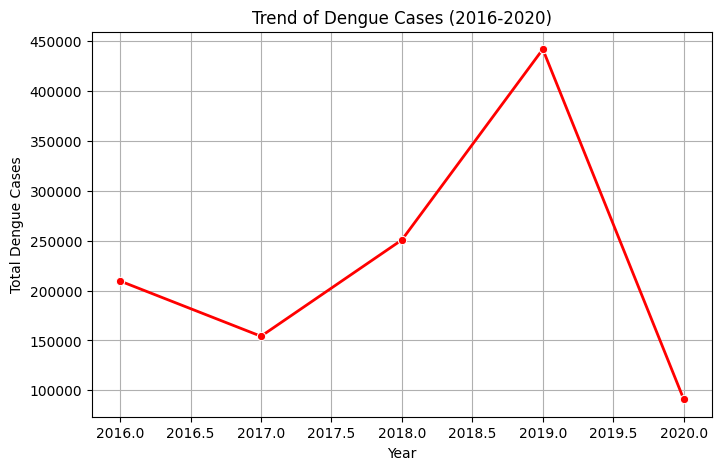

In [95]:
yearly_cases = dng.groupby("Year")["Dengue_Cases"].sum()


plt.figure(figsize=(8,5))
sns.lineplot(x=yearly_cases.index, y=yearly_cases.values, marker="o", linewidth=2, color="red")
plt.xlabel("Year")
plt.ylabel("Total Dengue Cases")
plt.title("Trend of Dengue Cases (2016-2020)")
plt.grid(True)
plt.show()

<h1>Dengue cases peaked in 2019 and dropped significantly in 2020.</h1>

<h1>7. Percentage of dengue cases per year</h1>

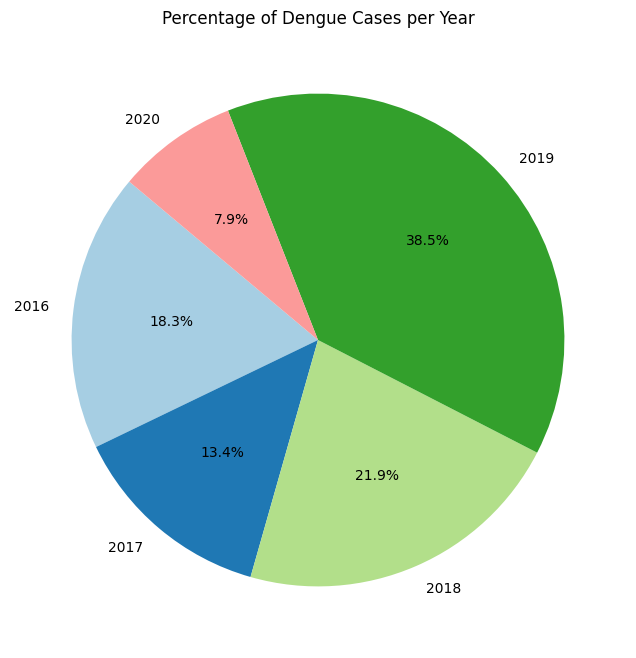

In [96]:
yearly_cases = dng.groupby("Year")["Dengue_Cases"].sum()


plt.figure(figsize=(8, 8))
plt.pie(yearly_cases, labels=yearly_cases.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Percentage of Dengue Cases per Year")
plt.show()

<h1>8. Fatality rate per region</h1>

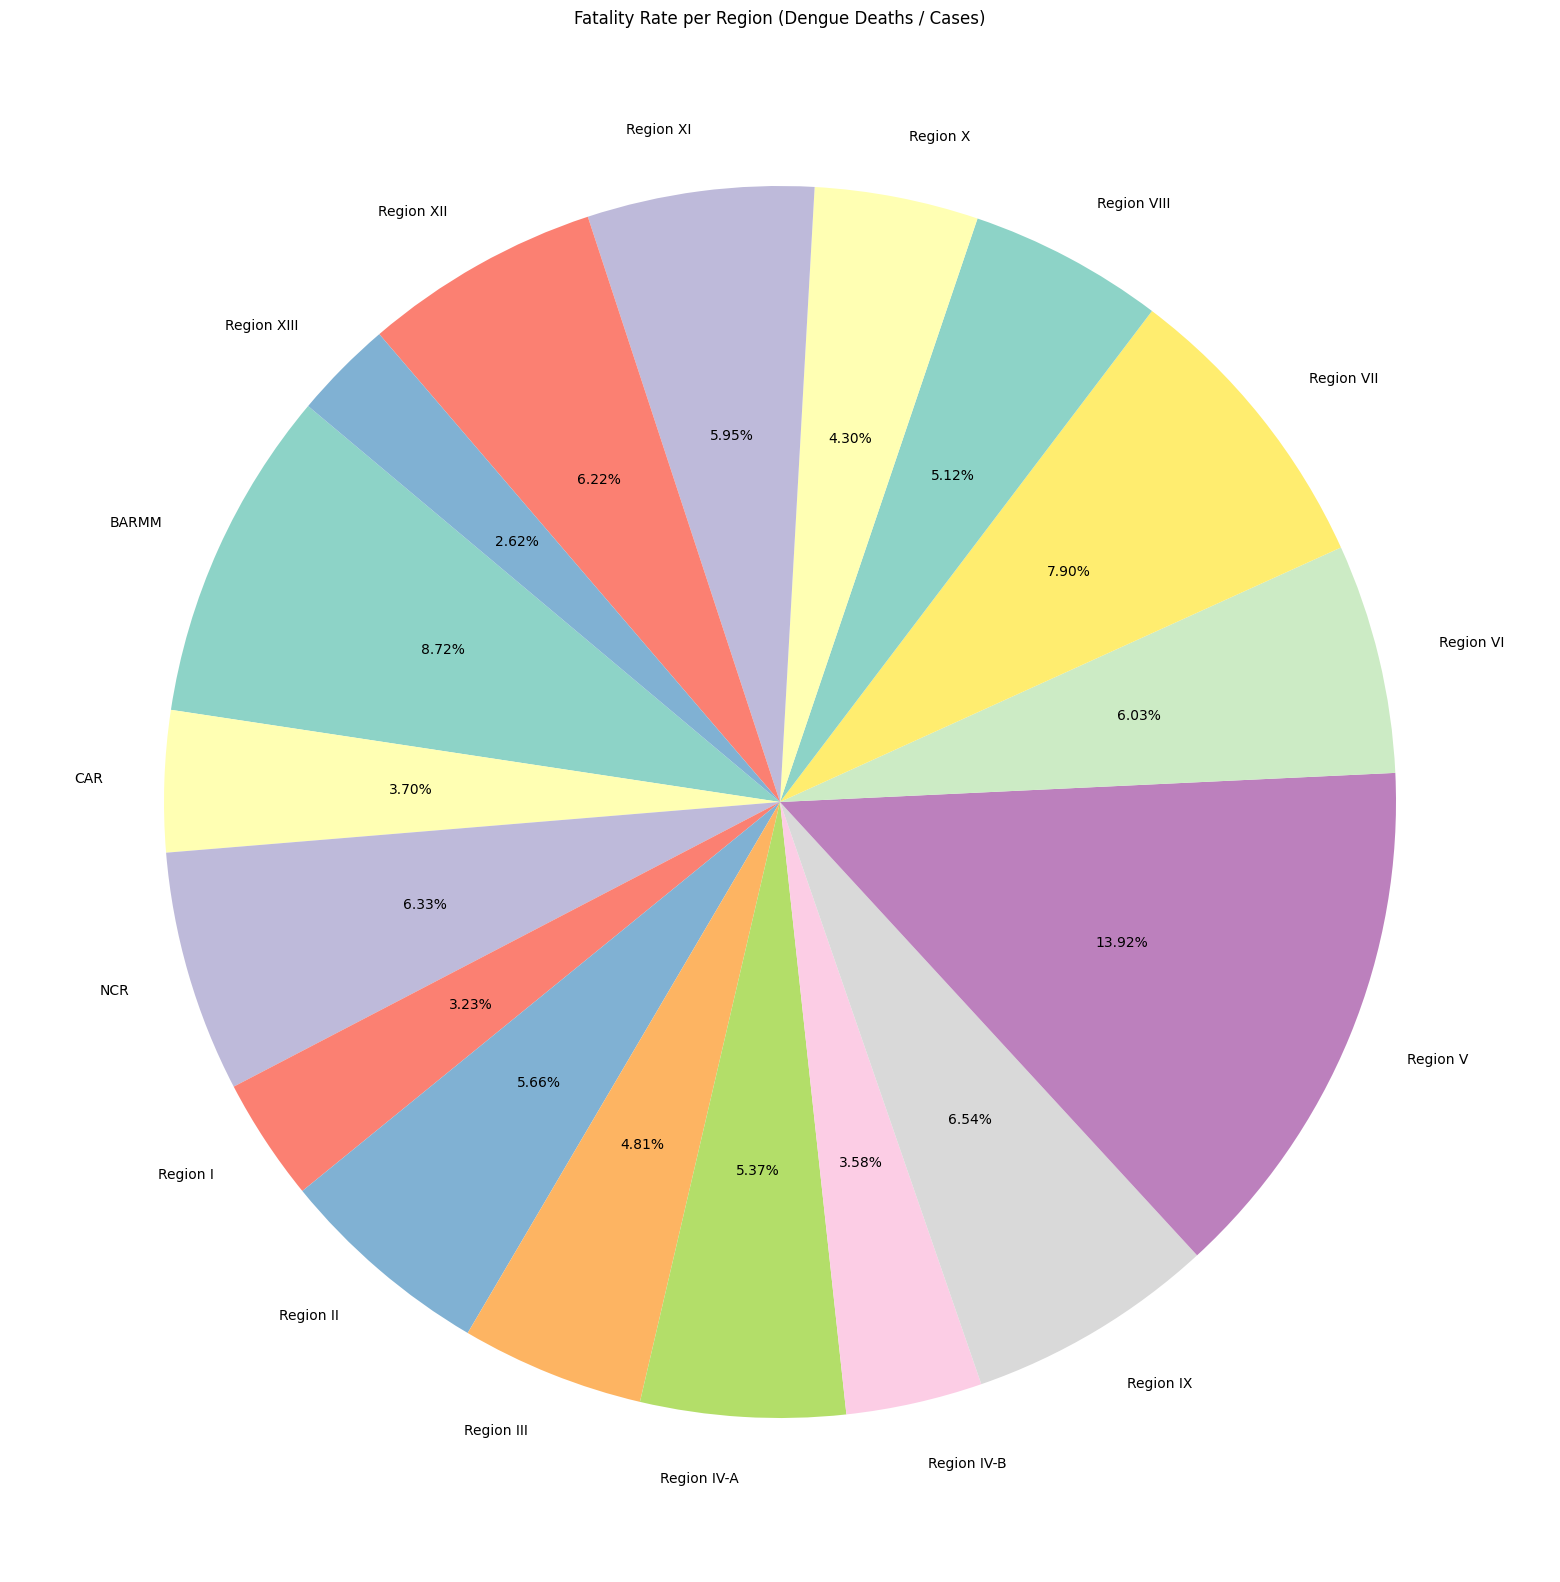

In [97]:
dng2019["Fatality_Rate"] = dng2019["Dengue_Deaths"] / dng2019["Dengue_Cases"]
fatality_rates = dng2019.groupby("Region")["Fatality_Rate"].mean()


plt.figure(figsize=(20, 20))
plt.pie(fatality_rates, labels=fatality_rates.index, autopct='%1.2f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title("Fatality Rate per Region (Dengue Deaths / Cases)")
plt.show()

<h1>9. What are the top 3 years with the highest number of deaths?</h1>

In [98]:
top_3_years_cases = dng.groupby("Year")["Dengue_Cases"].sum().nlargest(3)


print("Top 3 years with the highest dengue cases:")
print(top_3_years_cases)

Top 3 years with the highest dengue cases:
Year
2019    441902
2018    250783
2016    209544
Name: Dengue_Cases, dtype: int64


<h1>Dengue cases were highest in 2019, followed by 2018 and 2016.</h1>

<h1>10. Which month has the highest dengue cases in year 2019 on average?</h1>

In [99]:
dng.dtypes

Month            category
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

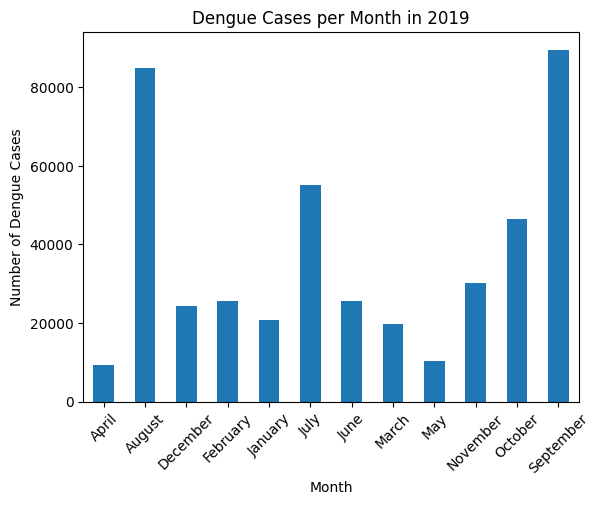

In [100]:
accident_permonth = dng2019.groupby("Month")["Dengue_Cases"].sum()


accident_permonth.plot(kind="bar",)


plt.title("Dengue Cases per Month in 2019")
plt.xlabel("Month")
plt.ylabel("Number of Dengue Cases")
plt.xticks(rotation=45)


plt.show()

<h1>11. Which month has the highest dengue deaths in year 2019 on average?</h1>

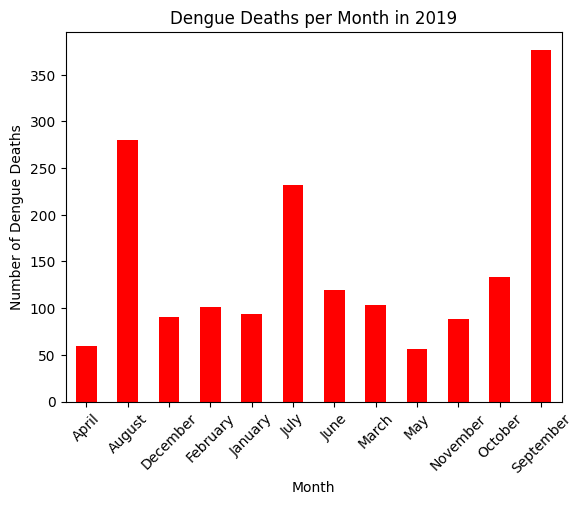

In [101]:
deaths_per_month = dng2019.groupby("Month")["Dengue_Deaths"].sum()


deaths_per_month.plot(kind="bar", color="red")


plt.title("Dengue Deaths per Month in 2019")
plt.xlabel("Month")
plt.ylabel("Number of Dengue Deaths")
plt.xticks(rotation=45)


plt.show()

<h1>12.What is the seasonal pattern of dengue cases rainy vs. dry months?</h1>

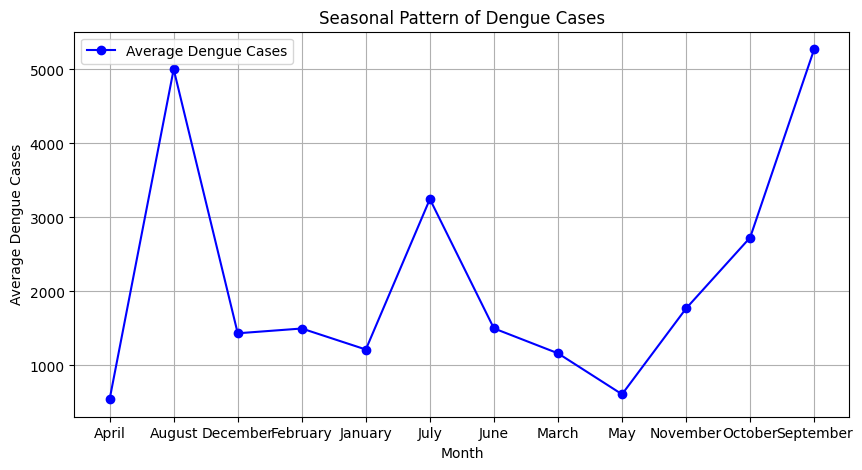

In [102]:
monthly_cases = dng2019.groupby("Month")["Dengue_Cases"].mean()


monthly_cases = monthly_cases.sort_index()


rainy_months = [6, 7, 8, 9, 10, 11] 

dry_months = [12, 1, 2, 3, 4, 5] 


plt.figure(figsize=(10, 5))
plt.plot(monthly_cases, marker='o', linestyle='-', color='b', label='Average Dengue Cases')


plt.title("Seasonal Pattern of Dengue Cases")
plt.xlabel("Month")
plt.ylabel("Average Dengue Cases")

plt.legend()
plt.grid(True)
plt.show()

<h1>13. is There a Corrolation between Dengue_Cases and  Dengue_Deaths?</h1>

In [103]:
dng.dtypes

Month            category
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

In [104]:
corrdng = dng['Dengue_Cases'].corr(dng['Dengue_Deaths'])
corrdng

np.float64(0.03832213720419488)

<h1>There is No significant correlation Between Dengue_Cases and Dengue_Deaths</h1>

<h1>14. What region has the highedt denggue cases across all rergion</h1>

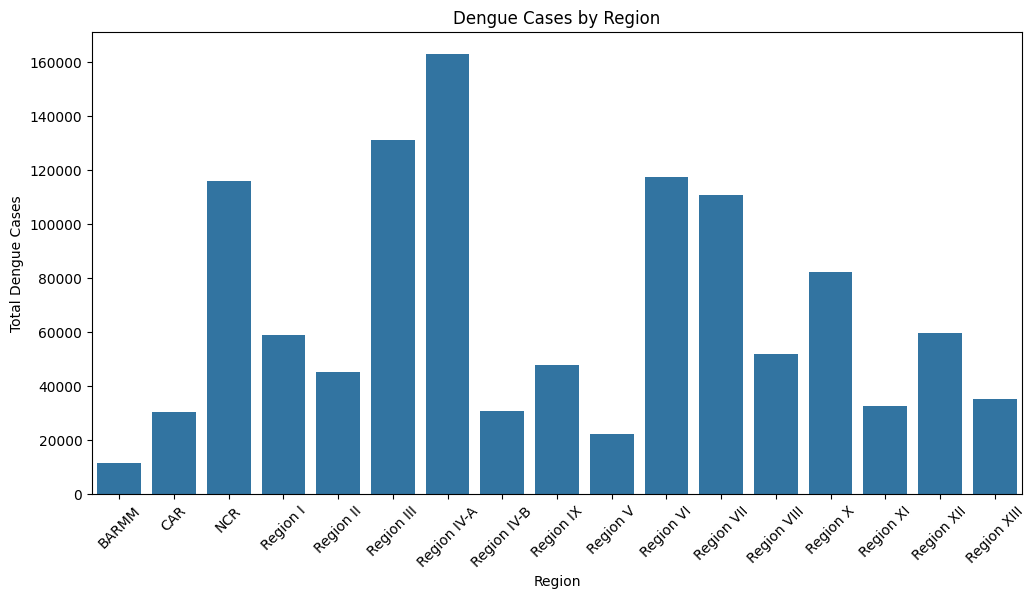

In [105]:
dta = dng.groupby('Region')['Dengue_Cases'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=dta.index, y=dta.values)

plt.xticks(rotation=45)
plt.title("Dengue Cases by Region")
plt.xlabel("Region")
plt.ylabel("Total Dengue Cases")
plt.show()

<h1>According to the bar plot Region IV-A has the highest dengue cases may be becuase of climate change, urbanization, and population</h1>    

<h1>15. Which region has the highest total number of dengue deaths?</h1>

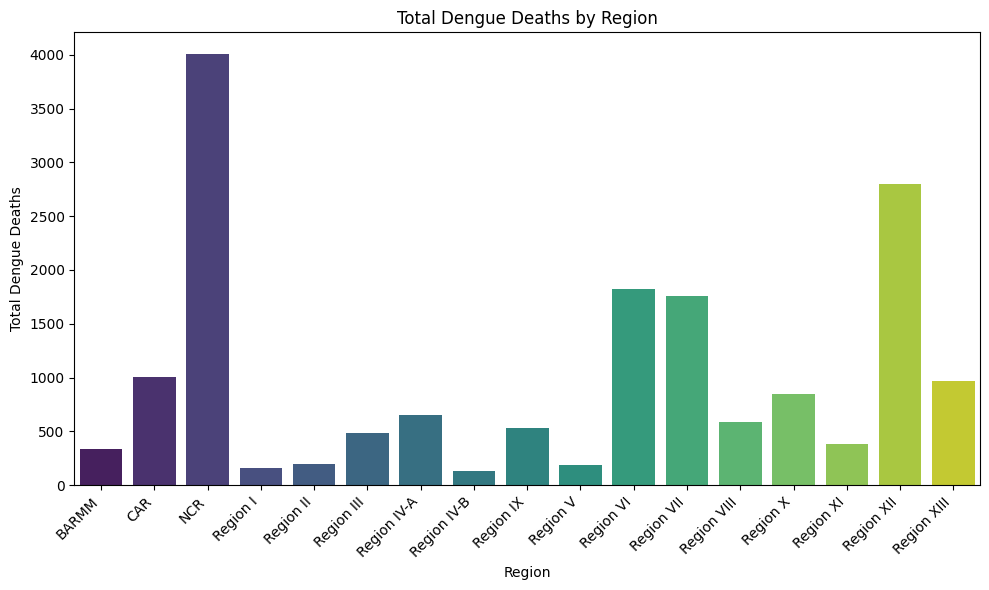

The region with the highest total number of dengue deaths is 'NCR' with 4008 deaths.


In [117]:
region_deaths = dng.groupby('Region')['Dengue_Deaths'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=region_deaths.index, y=region_deaths.values, palette="viridis")
plt.xlabel("Region")
plt.ylabel("Total Dengue Deaths")
plt.title("Total Dengue Deaths by Region")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
highest_death_count = region_deaths.max()
print(f"The region with the highest total number of dengue deaths is '{highest_death_region}' with {highest_death_count} deaths.")

<h1>The region with the highest total number of dengue deaths is 'NCR' with 4008 deaths.</h1>

<h1>16. Which 3 years have the highest total number of Dengue deaths?</h1>

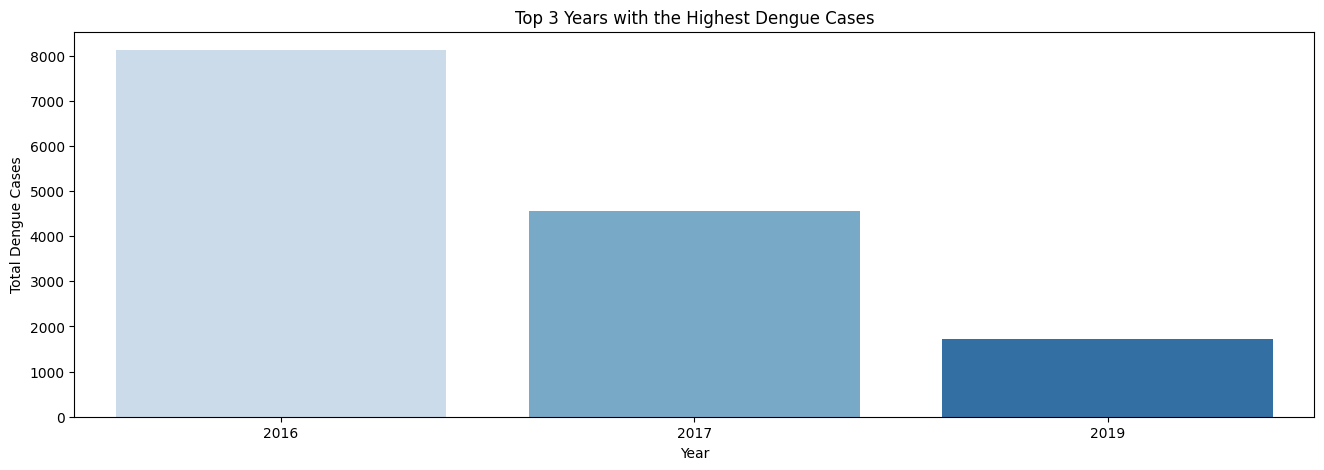

Top 3 years with the highest dengue cases:
Year
2016    8127
2017    4563
2019    1733
Name: Dengue_Deaths, dtype: int64


In [137]:
top_3_years_cases = dng.groupby("Year")["Dengue_Deaths"].sum().nlargest(3)
plt.figure(figsize=(16, 5))
sns.barplot(x=top_3_years_cases.index, y=top_3_years_cases.values, palette="Blues")
plt.title("Top 3 Years with the Highest Dengue Cases")
plt.xlabel("Year")
plt.ylabel("Total Dengue Cases")
plt.show()

print("Top 3 years with the highest dengue cases:")
print(top_3_years_cases)

<h1>17. Which 3 months have the highest total number of Dengue deaths?</h1>

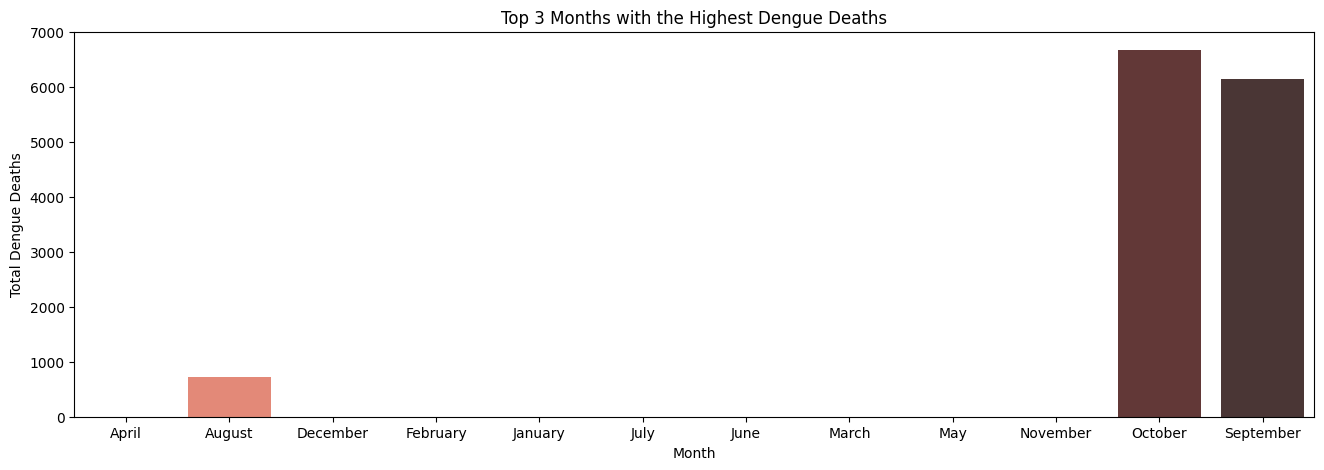

Top 3 years with the highest dengue cases:
Year
2016    8127
2017    4563
2019    1733
Name: Dengue_Deaths, dtype: int64


In [135]:
top_3_months_deaths = dng.groupby("Month")["Dengue_Deaths"].sum().nlargest(3)
plt.figure(figsize=(16, 5))
sns.barplot(x=top_3_months_deaths.index, y=top_3_months_deaths.values, palette="Reds_d")
plt.title("Top 3 Months with the Highest Dengue Deaths")
plt.xlabel("Month")
plt.ylabel("Total Dengue Deaths")
plt.show()

print("Top 3 years with the highest dengue cases:")
print(top_3_years_cases)

<h1>18. Which 3 months have the highest total number of Dengue cases?</h1>

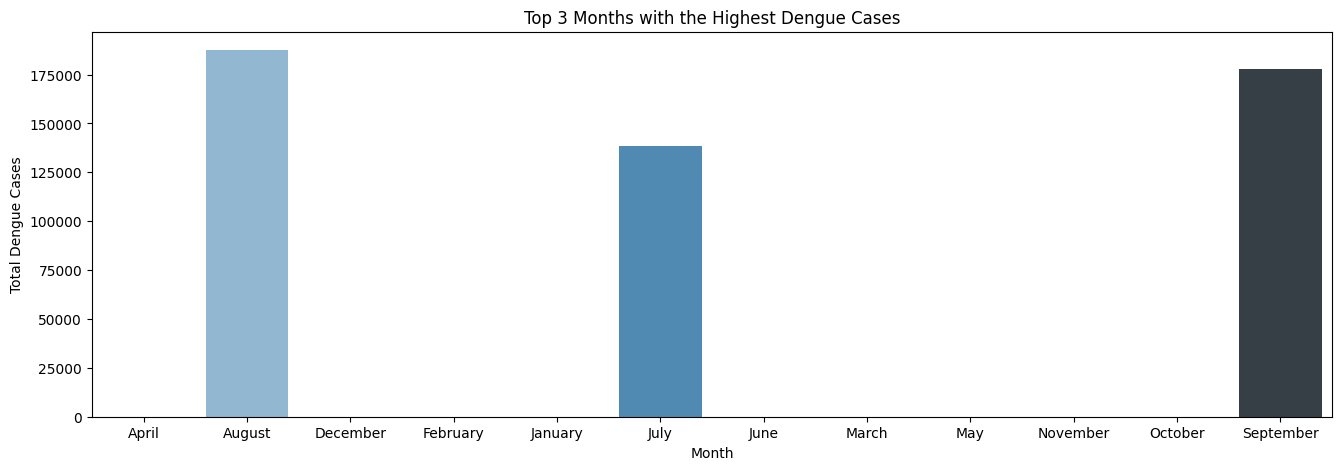

Top 3 years with the highest dengue cases:
Month
August       187554
September    177943
July         138242
Name: Dengue_Cases, dtype: int64


In [136]:
top_3_years_cases = dng.groupby("Month")["Dengue_Cases"].sum().nlargest(3)
plt.figure(figsize=(16, 5))
sns.barplot(x=top_3_years_cases.index, y=top_3_years_cases.values, palette="Blues_d")
plt.title("Top 3 Months with the Highest Dengue Cases")
plt.xlabel("Month")
plt.ylabel("Total Dengue Cases")
plt.show()

print("Top 3 years with the highest dengue cases:")
print(top_3_years_cases)

<h1>19. </h1>

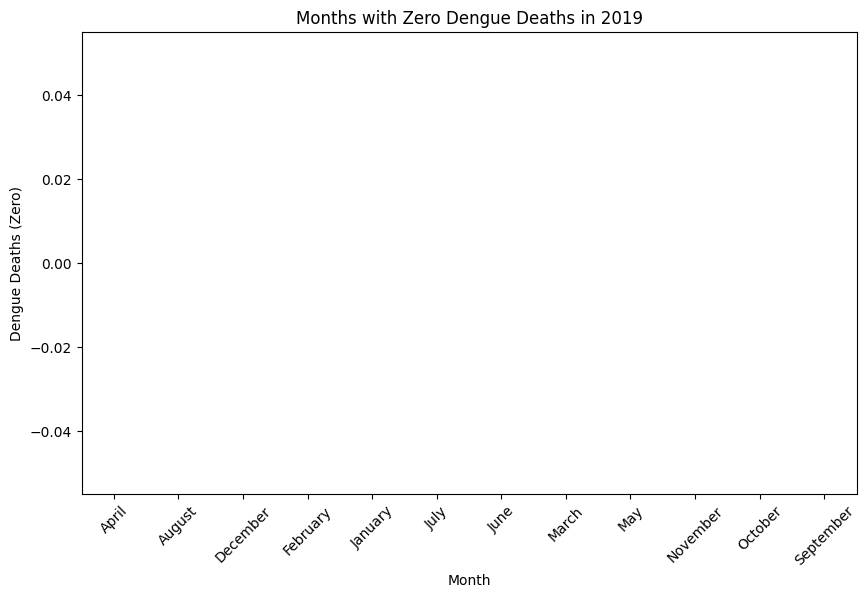

In [141]:
# month0 = dng2018[dng2018['Dengue_Deaths'] == 0]

# plt.figure(figsize=(10, 6))
# sns.barplot(x=month0['Month'], y=month0['Dengue_Deaths'], palette="coolwarm")
# plt.title("Months with Zero Dengue Deaths in 2019")
# plt.xlabel("Month")
# plt.ylabel("Dengue Deaths (Zero)")
# plt.xticks(rotation=45)  
# plt.show()

<h1>20. How many regions have reported zero Dengue deaths in any year?</h1>

In [149]:
zero_deaths_regions = dng[dng['Dengue_Deaths'] == 0]['Region'].nunique()
print(f"Number of regions with zero Dengue deaths in any year: {zero_deaths_regions}")

Number of regions with zero Dengue deaths in any year: 17
